
## Challenge Set 1  
Topic: Explore MTA turnstile data  
Date: 09/30/2016  
Name: Rebecca Hyde  
Worked with: Nils Hansen

In [151]:
from __future__ import print_function, division

In [152]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

# enable inline plots so that plot show up in the notebook
%matplotlib inline

# set pandas so that no more than 10-20 lines of data (of data frame or array) are printed.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.precision', 3)

# instruction: to compare results consistently, where applicable, use: test_size=0.30, random_state=4444

Exercise 1.1

- Open up a new Jupyter notebook
- Download a few MTA turnstile data files
- Open up a file, use csv reader to read it, make a python dict where there is a key for each (C/A, UNIT, SCP, STATION). These are the first four columns. The value for this key should be a list of lists. Each list in the list is the rest of the columns in a row. For example, one key-value pair should look like:
{ ('A002','R051','02-00-00','LEXINGTON AVE'): [ ['NQR456', 'BMT', '01/03/2015', '03:00:00', 'REGULAR', '0004945474', '0001675324'], ['NQR456', 'BMT', '01/03/2015', '07:00:00', 'REGULAR', '0004945478', '0001675333'], ['NQR456', 'BMT', '01/03/2015', '11:00:00', 'REGULAR', '0004945515', '0001675364'], ... ] }

In [153]:
# download a few MTA turnstile data files and use csv reader to read the files

df = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_160917.txt')
dftemp = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_160910.txt')
df = df.append(dftemp, ignore_index = True)
dftemp = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_160903.txt')
df = df.append(dftemp, ignore_index = True)
dftemp = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_160827.txt')
df = df.append(dftemp, ignore_index = True)
dftemp = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_160820.txt')
df = df.append(dftemp, ignore_index = True)

# sort by C/A, UNIT, SCP, STATION

df = df.sort_values(["C/A", "UNIT", "SCP", "STATION"])

In [154]:
df.columns = [column.strip() for column in df.columns]


Exercise 1.2

- Let's turn this into a time series.

For each key (basically the control area, unit, device address and station of a specific turnstile), have a list again, but let the list be comprised of just the point in time and the count of entries.

This basically means keeping only the date, time, and entries fields in each list. You can convert the date and time into datetime objects -- That is a python class that represents a point in time. You can combine the date and time fields into a string and use the dateutil module to convert it into a datetime object. For an example check this StackOverflow question.

Your new dict should look something like

{ ('A002','R051','02-00-00','LEXINGTON AVE'): [ [datetime.datetime(2013, 3, 2, 3, 0), 3788], [datetime.datetime(2013, 3, 2, 7, 0), 2585], [datetime.datetime(2013, 3, 2, 12, 0), 10653], [datetime.datetime(2013, 3, 2, 17, 0), 11016], [datetime.datetime(2013, 3, 2, 23, 0), 10666], [datetime.datetime(2013, 3, 3, 3, 0), 10814], [datetime.datetime(2013, 3, 3, 7, 0), 10229], ... ], .... }

In [155]:
# add a column that combines date and time in the datetime format

df["DATETIME"] = pd.to_datetime(df.DATE + " " + df.TIME, 
                                           format = "%m/%d/%Y %H:%M:%S")
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,00:00:00,REGULAR,5817505,1971936,2016-09-10 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,04:00:00,REGULAR,5817544,1971940,2016-09-10 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,08:00:00,REGULAR,5817564,1971981,2016-09-10 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,12:00:00,REGULAR,5817678,1972094,2016-09-10 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,16:00:00,REGULAR,5817925,1972180,2016-09-10 16:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
963042,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/19/2016,05:00:00,REGULAR,5554,257,2016-08-19 05:00:00
963043,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/19/2016,09:00:00,REGULAR,5554,257,2016-08-19 09:00:00
963044,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/19/2016,13:00:00,REGULAR,5554,257,2016-08-19 13:00:00
963045,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/19/2016,17:00:00,REGULAR,5554,257,2016-08-19 17:00:00


In [156]:
# sanity check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique

(df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATETIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATETIME,ENTRIES
938152,R634,R069,00-00-00,NEW LOTS AV,2016-08-21 12:00:00,2
938158,R634,R069,00-00-00,NEW LOTS AV,2016-08-22 12:00:00,2
852112,R504,R276,00-00-01,VERNON-JACKSON,2016-09-16 08:00:00,2
938151,R634,R069,00-00-00,NEW LOTS AV,2016-08-21 08:00:00,2
938148,R634,R069,00-00-00,NEW LOTS AV,2016-08-20 20:00:00,2


In [157]:
# get rid of the duplicate entries

df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATETIME"], inplace=True, ascending=False)
df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATETIME"], inplace=True)

In [158]:
#get rid of columns that aren't needed

df = df.drop(['DESC', 'EXITS'], axis = 1, errors = "ignore")
df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATETIME
192877,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/16/2016,21:00:00,5554,2016-09-16 21:00:00
192876,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/16/2016,17:00:00,5554,2016-09-16 17:00:00
192875,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/16/2016,13:00:00,5554,2016-09-16 13:00:00
192874,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/16/2016,09:00:00,5554,2016-09-16 09:00:00
192873,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/16/2016,05:00:00,5554,2016-09-16 05:00:00
192872,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/16/2016,01:00:00,5554,2016-09-16 01:00:00
192871,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/15/2016,21:00:00,5554,2016-09-15 21:00:00
192870,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/15/2016,17:00:00,5554,2016-09-15 17:00:00
192869,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/15/2016,13:00:00,5554,2016-09-15 13:00:00
192868,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/15/2016,09:00:00,5554,2016-09-15 09:00:00


Exercise 1.3: 
- These counts are for every n hours. (What is n?) Answer: N is 4 hours. We want total daily entries.  

Now make it that we again have the same keys, but now we have a single value for a single day, 
which is the total number of passengers that entered through this turnstile on this day.

In [159]:
df = df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"]).ENTRIES.first().reset_index()
df.head()


,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,08/13/2016,5780627
1,A002,R051,02-00-00,59 ST,08/14/2016,5781507
2,A002,R051,02-00-00,59 ST,08/15/2016,5782205
3,A002,R051,02-00-00,59 ST,08/16/2016,5783801
4,A002,R051,02-00-00,59 ST,08/17/2016,5785381


In [160]:
# create new columns with previous date and entry
df[["PREV_DATE", "PREV_ENTRIES"]] = (df
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .transform(lambda grp: grp.shift(1)))
df.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,08/13/2016,5780627,NaN,NaN
1,A002,R051,02-00-00,59 ST,08/14/2016,5781507,08/13/2016,5.781e+06
2,A002,R051,02-00-00,59 ST,08/15/2016,5782205,08/14/2016,5.782e+06
3,A002,R051,02-00-00,59 ST,08/16/2016,5783801,08/15/2016,5.782e+06
4,A002,R051,02-00-00,59 ST,08/17/2016,5785381,08/16/2016,5.784e+06


In [161]:
# drop the rows for first date which does not have a previous date (for these one would need to get another mta file, one week further back)
df.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [162]:
# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits

def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # May be counter is reversed?
        counter = -counter
    if counter > max_counter:
        #print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we are not giving a counter that's too big
        return 0
    return counter

df["DAILY_ENTRIES"] = df.apply(get_daily_counts, axis=1, max_counter=1000000)

In [163]:
df.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,08/14/2016,5781507,08/13/2016,5.781e+06,880.0
2,A002,R051,02-00-00,59 ST,08/15/2016,5782205,08/14/2016,5.782e+06,698.0
3,A002,R051,02-00-00,59 ST,08/16/2016,5783801,08/15/2016,5.782e+06,1596.0
4,A002,R051,02-00-00,59 ST,08/17/2016,5785381,08/16/2016,5.784e+06,1580.0
5,A002,R051,02-00-00,59 ST,08/18/2016,5786983,08/17/2016,5.785e+06,1602.0


Exercise 1.4:

We will plot the daily time series for a turnstile.

In Jupyter notebook, add this to the beginning of your next cell:

%matplotlib inline
This will make your matplotlib graphs integrate nicely with the notebook. To plot the time series, import matplotlib with

import matplotlib.pyplot as plt
Take the list of [(date1, count1), (date2, count2), ...], for the turnstile and turn it into two lists: dates and counts. This should plot it:

plt.figure(figsize=(10,3))
plt.plot(dates,counts)

In [164]:
# take the list of [(date1, count1), (date2, count2), ...], 
# for the turnstile and turn it into two lists: dates and counts


#dates for turnstile (df["C/A"] == 'A002')&(df.UNIT == 'R051')&(df.SCP=='02-00-00')&(df.STATION=='59 ST')
df_dates = df.loc[(df["C/A"] == 'A002')&(df.UNIT == 'R051')&(df.SCP=='02-00-00')&(df.STATION=='59 ST'),["DATE"]]
df_dates = pd.to_datetime(df_dates.DATE, infer_datetime_format=True)

In [165]:
#daily counts for turnstile (df["C/A"] == 'A002')&(df.UNIT == 'R051')&(df.SCP=='02-00-00')&(df.STATION=='59 ST')
df_counts = df.loc[(df["C/A"] == 'A002')&(df.UNIT == 'R051')&(df.SCP=='02-00-00')&(df.STATION=='59 ST'),["DAILY_ENTRIES"]]

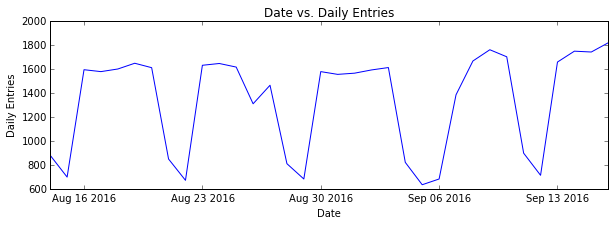

In [166]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))
plt.plot(df_dates,df_counts)

plt.title('Date vs. Daily Entries')
plt.xlabel('Date')
plt.ylabel('Daily Entries')

Exercise 1.5:

- So far we've been operating on a single turnstile level, let's combine turnstiles in the same ControlArea/Unit/Station combo. There are some ControlArea/Unit/Station groups that have a single turnstile, but most have multiple turnstilea-- same value for the C/A, UNIT and STATION columns, different values for the SCP column.

We want to combine the numbers together -- for each ControlArea/UNIT/STATION combo, for each day, add the counts from each turnstile belonging to that combo.

In [167]:
# for each ControlArea/UNIT/STATION combo, for each day, add the counts from each turnstile belonging to that combo

df = (df
.groupby(['C/A', 'UNIT', 'STATION', 'DATE'])
.sum()
.reset_index()
.sort_values(['C/A', 'UNIT', 'STATION', 'DATE','DAILY_ENTRIES'],)
)
df


,C/A,UNIT,STATION,DATE,ENTRIES,PREV_ENTRIES,DAILY_ENTRIES
0,A002,R051,59 ST,08/14/2016,56322652,5.631e+07,9634.0
1,A002,R051,59 ST,08/15/2016,56330508,5.632e+07,7856.0
2,A002,R051,59 ST,08/16/2016,56346392,5.633e+07,15884.0
3,A002,R051,59 ST,08/17/2016,56363168,5.635e+07,16776.0
4,A002,R051,59 ST,08/18/2016,56380165,5.636e+07,16997.0
...,...,...,...,...,...,...,...
24674,TRAM2,R469,RIT-ROOSEVELT,09/12/2016,8195205,8.192e+06,3694.0
24675,TRAM2,R469,RIT-ROOSEVELT,09/13/2016,8199018,8.195e+06,3813.0
24676,TRAM2,R469,RIT-ROOSEVELT,09/14/2016,8203082,8.199e+06,4064.0
24677,TRAM2,R469,RIT-ROOSEVELT,09/15/2016,8206976,8.203e+06,3894.0


Exercise 1.6

Similarly, combine everything in each station, and come up with a time series of [(date1, count1),(date2,count2),...] type of time series for each STATION, by adding up all the turnstiles in a station.

In [168]:
df = (df
.groupby(['STATION', 'DATE'])
.sum()
.reset_index()
.sort_values(['STATION', 'DATE','DAILY_ENTRIES'],)
)
df

,STATION,DATE,ENTRIES,PREV_ENTRIES,DAILY_ENTRIES
0,1 AV,08/14/2016,1412017068,1.412e+09,14593.0
1,1 AV,08/15/2016,1412028862,1.412e+09,11794.0
2,1 AV,08/16/2016,1412047632,1.412e+09,18770.0
3,1 AV,08/17/2016,1412067258,1.412e+09,19626.0
4,1 AV,08/18/2016,1412087771,1.412e+09,20513.0
...,...,...,...,...,...
12657,ZEREGA AV,09/12/2016,54011939,5.401e+07,1058.0
12658,ZEREGA AV,09/13/2016,54014347,5.401e+07,2408.0
12659,ZEREGA AV,09/14/2016,54017180,5.401e+07,2833.0
12660,ZEREGA AV,09/15/2016,54020023,5.402e+07,2843.0


Exercise 1.7

Plot the time series for a station.

In [169]:
#dates for 1 station (df.STATION=='59 ST')
df_dates = df.loc[(df.STATION=='59 ST'),["DATE"]]
df_dates = pd.to_datetime(df_dates.DATE, infer_datetime_format=True)

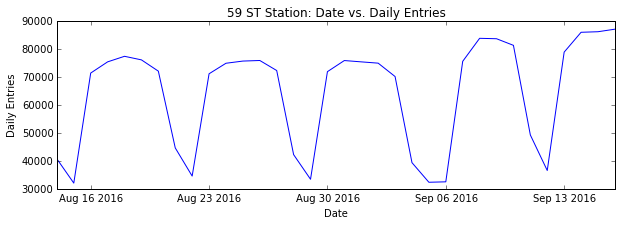

In [170]:
#counts for 1 station(df.STATION=='59 ST')
df_counts = df.loc[(df.STATION=='59 ST'),["DAILY_ENTRIES"]]

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))
plt.plot(df_dates,df_counts)

plt.title('59 ST Station: Date vs. Daily Entries')
plt.xlabel('Date')
plt.ylabel('Daily Entries')

Exercise 1.8

- Make one list of counts for one week for one station. Monday's count, Tuesday's count, etc. so it's a list of 7 counts. Make the same list for another week, and another week, and another week. plt.plot(week_count_list) for every week_count_list you created this way. You should get a rainbow plot of weekly commute numbers on top of each other.

In [171]:
# permanently add datetime column to DataFrame
df["DATETIME"] = df["DATE"]
df["DATETIME"] = pd.to_datetime(df.DATETIME, infer_datetime_format=True)

In [172]:
# add column for day of week
df['DAY_OF_WEEK'] = df['DATETIME'].dt.dayofweek

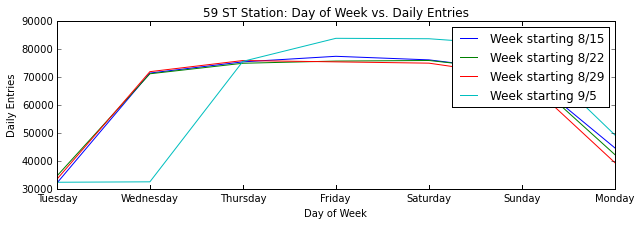

In [173]:
# day_of_week/counts for turnstile (df.STATION=='59 ST')- week1
df_counts1 = df.loc[(df.STATION=='59 ST')&(df.DATE>="08/15/2016")&(df.DATE<"08/22/2016"),["DAY_OF_WEEK","DAILY_ENTRIES"]]

# day_of_week/counts for turnstile (df.STATION=='59 ST')- week2
df_counts2 = df.loc[(df.STATION=='59 ST')&(df.DATE>="08/22/2016")&(df.DATE<"08/29/2016"),["DAY_OF_WEEK","DAILY_ENTRIES"]]

# day_of_week/counts for turnstile (df.STATION=='59 ST')- week3
df_counts3 = df.loc[(df.STATION=='59 ST')&(df.DATE>="08/29/2016")&(df.DATE<"09/05/2016"),["DAY_OF_WEEK","DAILY_ENTRIES"]]

# day_of_week/counts for turnstile (df.STATION=='59 ST')- week4
df_counts4 = df.loc[(df.STATION=='59 ST')&(df.DATE>="09/05/2016")&(df.DATE<"09/12/2016"),["DAY_OF_WEEK","DAILY_ENTRIES"]]

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))
my_xticks = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(df["DAY_OF_WEEK"], my_xticks)
plt.plot(df_counts1["DAY_OF_WEEK"],df_counts1["DAILY_ENTRIES"])
plt.plot(df_counts2["DAY_OF_WEEK"],df_counts2["DAILY_ENTRIES"])
plt.plot(df_counts3["DAY_OF_WEEK"],df_counts3["DAILY_ENTRIES"])
plt.plot(df_counts4["DAY_OF_WEEK"],df_counts4["DAILY_ENTRIES"])

plt.title('59 ST Station: Day of Week vs. Daily Entries')
plt.xlabel('Day of Week')
plt.ylabel('Daily Entries')
plt.legend(['Week starting 8/15', 'Week starting 8/22', 'Week starting 8/29', 'Week starting 9/5'], loc='upper right')


Exercise 1.9

- Over multiple weeks, sum total ridership for each station and sort them, so you can find out the stations with the highest traffic during the time you investigate

In [174]:
df = df.drop(['DATETIME','DAY_OF_WEEK'], axis = 1)

In [175]:
dfA = (df
.groupby(['STATION'])
.DAILY_ENTRIES.sum()
.reset_index()
.sort_values('DAILY_ENTRIES', ascending=[False])
)
dfA

,STATION,DAILY_ENTRIES
61,34 ST-PENN STA,4.711e+06
230,GRD CNTRL-42 ST,4.059e+06
59,34 ST-HERALD SQ,3.438e+06
46,23 ST,3.283e+06
14,14 ST-UNION SQ,2.981e+06
...,...,...
138,BEACH 105 ST,1.226e+04
159,BROAD CHANNEL,9.115e+03
306,ORCHARD BEACH,3.851e+03
315,PENNSYLVANIA AV,1.048e+03


Exercise 1.10:

- Make a single list of these total ridership values and plot it with

    plt.hist(total_ridership_counts)

to get an idea about the distribution of total ridership among different stations.

This should show you that most stations have a small traffic, and the histogram bins for large traffic volumes have small bars.

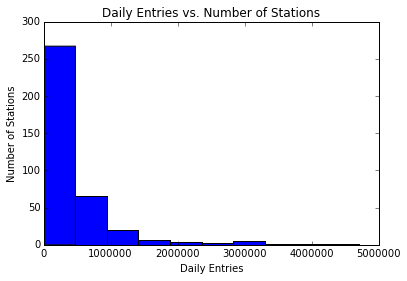

In [176]:
plt.hist(dfA["DAILY_ENTRIES"])


plt.title('Daily Entries vs. Number of Stations')
plt.xlabel('Daily Entries')
plt.ylabel('Number of Stations')